In [2]:
import pandas as pd
import numpy as np
import seaborn  as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import math

plt.rc('font', family='Malgun Gothic')

In [19]:
survey = pd.read_csv('../data/SURVEY.csv',encoding='cp949')
survey.columns

Index(['조사차수', '일반_대표자_성별코드', '대표자연령대코드', '일반_합계종사자수', '일반_합계_남자종사자수',
       '일반_합계_여자종사자수', '일반_대표자종사자수', '일반_대표자_남자종사자수', '일반_대표자_여자종사자수',
       '일반_근로계약기간_1년이상_종사자수',
       ...
       '사업전환_노후준비1해당여부', '사업전환_노후준비2해당여부', '사업전환_노후준비3해당여부', '사업전환_노후준비4해당여부',
       '사업전환_노후준비5해당여부', '사업체수가중값', '종사자수가중값', '매출금액가중값', '행정구역시도코드', '기준연도'],
      dtype='object', length=110)

In [3]:
df = pd.read_csv('../data/SURVEY_for_RF.csv')

# 01) 모든 컬럼 포함

In [4]:
x2 = df.drop(['경영_영업이익'],axis=1)
y2 = df['경영_영업이익']

x2_train, x2_valid, y2_train, y2_valid= train_test_split(x2, y2, test_size=0.2, random_state=0)

In [6]:
params = {
    'n_estimators':(100, 200, 300),
    'max_depth' : (4 ,6, 8, 10, 12),
    'min_samples_leaf' : (4, 6, 8, 10, 12),
    'min_samples_split' : (4, 6, 8, 10, 12)
}

rf = RandomForestRegressor(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf, param_grid=params, scoring='neg_mean_squared_error', cv=10, n_jobs=-1)
grid_cv.fit(x2_train, y2_train)
 
 
print('최적 하이퍼 파라미터:', grid_cv.best_params_)
print('최적 MSE: {0:.4f}'.format(-grid_cv.best_score_))

최적 하이퍼 파라미터: {'max_depth': 12, 'min_samples_leaf': 12, 'min_samples_split': 4, 'n_estimators': 300}
최적 MSE: 18421.1189


In [7]:
rf = RandomForestRegressor(random_state=0, max_depth=12, min_samples_leaf=12, min_samples_split=4, n_estimators=300)
rf.fit(x2_train, y2_train)

RandomForestRegressor(max_depth=12, min_samples_leaf=12, min_samples_split=4,
                      n_estimators=300, random_state=0)

In [8]:
# train rmse
train_predict = rf.predict(x2_train)
print("RMSE:{}".format(math.sqrt(mean_squared_error(train_predict, y2_train))))

# valid rmse
valid_predict = rf.predict(x2_valid)
print("RMSE:{}".format(math.sqrt(mean_squared_error(valid_predict, y2_valid))))

RMSE:121.93771747504947
RMSE:211.6011512425351


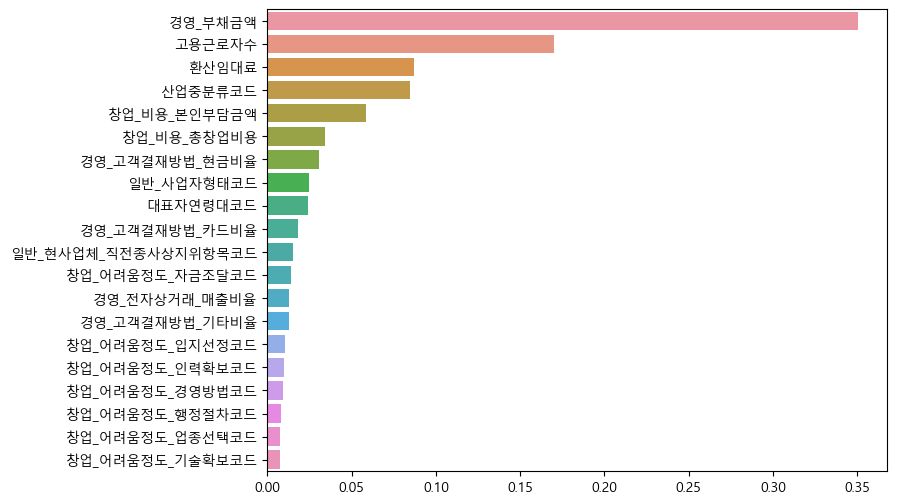

In [9]:
ftr_importances_values = rf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=x2_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:20]
 
plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

# 02) 변수 중요도 상위 4개 제외

In [10]:
df2 = df.drop(labels=['경영_부채금액','고용근로자수','환산임대료','산업중분류코드'],axis=1)

In [15]:
df2.columns

Index(['일반_대표자_성별코드', '대표자연령대코드', '일반_사업자형태코드', '일반_창업형태코드',
       '일반_현사업체_직전종사상지위항목코드', '창업_비용_총창업비용', '창업_비용_본인부담금액', '창업_어려움정도_입지선정코드',
       '창업_어려움정도_업종선택코드', '창업_어려움정도_자금조달코드', '창업_어려움정도_기술확보코드',
       '창업_어려움정도_인력확보코드', '창업_어려움정도_행정절차코드', '창업_어려움정도_경영방법코드',
       '경영_고객결재방법_현금비율', '경영_고객결재방법_카드비율', '경영_고객결재방법_간편결제비율',
       '경영_고객결재방법_어음비율', '경영_고객결재방법_기타비율', '경영_영업이익', '경영_전자상거래_매출비율'],
      dtype='object')

In [11]:
x2 = df2.drop(['경영_영업이익'],axis=1)
y2 = df2['경영_영업이익']

x2_train, x2_valid, y2_train, y2_valid= train_test_split(x2, y2, test_size=0.2, random_state=0)

In [12]:
rf = RandomForestRegressor(random_state=0, max_depth=12, min_samples_leaf=12, min_samples_split=4, n_estimators=300)
rf.fit(x2_train, y2_train)

RandomForestRegressor(max_depth=12, min_samples_leaf=12, min_samples_split=4,
                      n_estimators=300, random_state=0)

In [13]:
# train rmse
train_predict = rf.predict(x2_train)
print("RMSE:{}".format(math.sqrt(mean_squared_error(train_predict, y2_train))))

# valid rmse
valid_predict = rf.predict(x2_valid)
print("RMSE:{}".format(math.sqrt(mean_squared_error(valid_predict, y2_valid))))

RMSE:130.1988190657425
RMSE:214.8785795182751


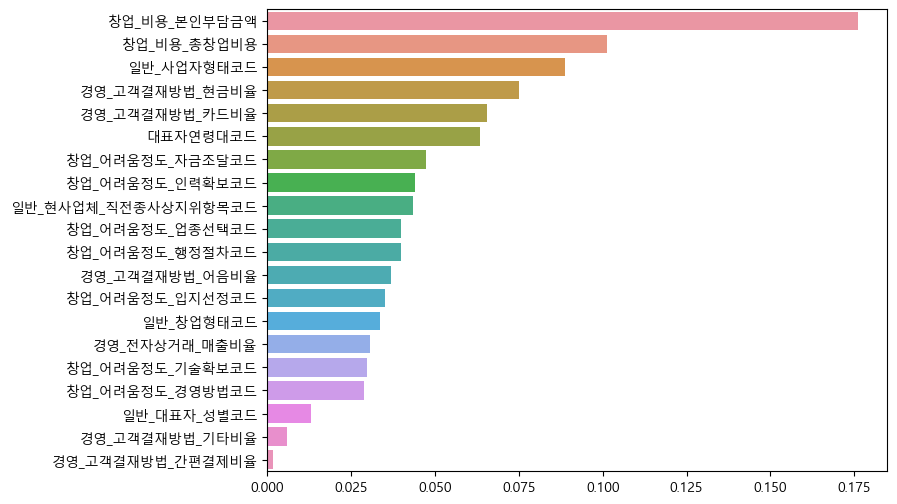

In [14]:
ftr_importances_values = rf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=x2_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:20]
 
plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

In [24]:
df2.columns

Index(['일반_대표자_성별코드', '대표자연령대코드', '일반_사업자형태코드', '일반_창업형태코드',
       '일반_현사업체_직전종사상지위항목코드', '창업_비용_총창업비용', '창업_비용_본인부담금액', '창업_어려움정도_입지선정코드',
       '창업_어려움정도_업종선택코드', '창업_어려움정도_자금조달코드', '창업_어려움정도_기술확보코드',
       '창업_어려움정도_인력확보코드', '창업_어려움정도_행정절차코드', '창업_어려움정도_경영방법코드',
       '경영_고객결재방법_현금비율', '경영_고객결재방법_카드비율', '경영_고객결재방법_간편결제비율',
       '경영_고객결재방법_어음비율', '경영_고객결재방법_기타비율', '경영_영업이익', '경영_전자상거래_매출비율'],
      dtype='object')

<Axes: xlabel='창업_비용_본인부담금액', ylabel='경영_영업이익'>

c:\Users\Samsung\anaconda3\envs\DA\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
c:\Users\Samsung\anaconda3\envs\DA\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


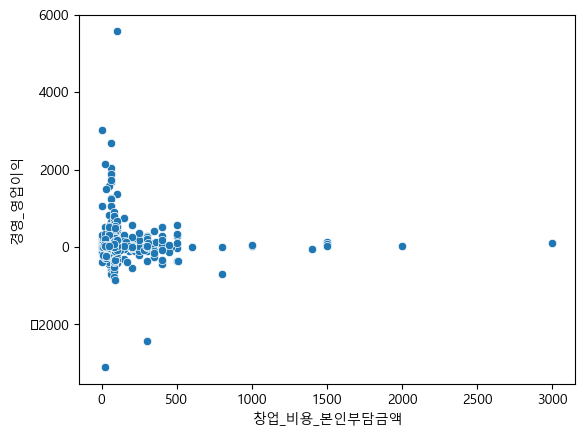

In [23]:
sns.scatterplot(x=df2['창업_비용_본인부담금액'],y=df2['경영_영업이익'])

<Axes: xlabel='경영_전자상거래_매출비율', ylabel='경영_영업이익'>

c:\Users\Samsung\anaconda3\envs\DA\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
c:\Users\Samsung\anaconda3\envs\DA\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


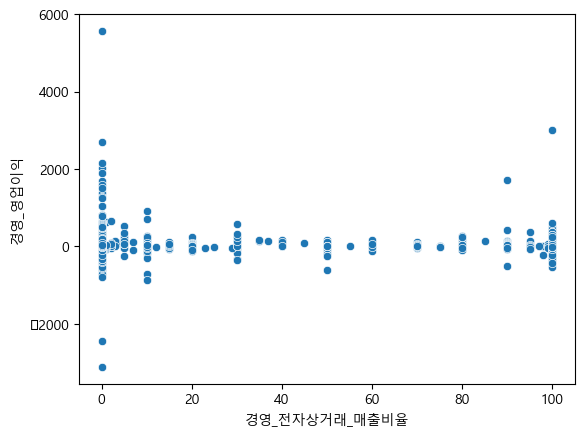

In [25]:
sns.scatterplot(x=df2['경영_전자상거래_매출비율'],y=df2['경영_영업이익'])

In [27]:
survey['창업_어려움정도_경영방법코드'].value_counts()

2.960029    2448
2.946319     954
3.000000     719
4.000000     485
2.000000     484
1.000000     282
5.000000     236
2.991228      77
2.880000      21
3.285714      13
Name: 창업_어려움정도_경영방법코드, dtype: int64